In [1]:
%matplotlib inline
import numpy as np

from pylab import *

In [180]:
path = "/Users/npk/extract/"

In [181]:
ms, rs = np.load(path + "/c1_results.npy")

## Some Sanity Checks

Look at observation airmass over time.

In [183]:
def time_2_float(bs):
    h,m,s = map(int, (bs[0:2], bs[3:5], bs[6:8]))
    
    return h*3600. + m*60. + s
gammas = ms["AIRMASS"]
secs = list(map(time_2_float, ms["UT-TIME"]))

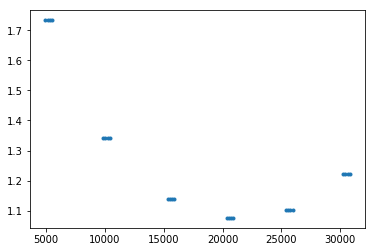

In [184]:
plot(secs, gammas, '.') 

## Identify clean photometry

In [208]:
def good_part(x):
    X = "X_IMAGE"
    Y = "Y_IMAGE"
    
    return (x[X][0] > 150) & (x[X][0] < 1900) & \
        (x[Y][0] > 150) & (x[Y][0] < 1900)

In [241]:
cs = {}
for k,r in rs.items():
    if good_part(r):
        cs[k] = r

print(len(cs), len(rs))

5812 7843


In [242]:
OKs = []


for ix, k in enumerate(cs.keys()):
    if np.all(cs[k]["MAG_APER_4"] < 90):
        OKs.append(k)

print(len(OKs))

1903


In [244]:
def plot_mags(Mag = "MAG_APER_2", todo=slice(0,10)):
    for OK in OKs[todo]:
        ms = cs[OK][Mag]
        m0 = ms[0]
        plot(secs, ms - m0, 'o')

## What aperture size to use? 

Looks like the most precise is the largest (APER_4)

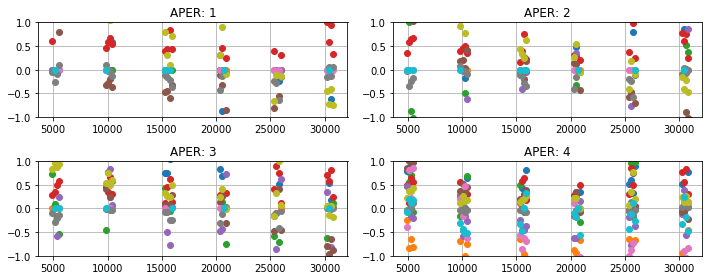

In [245]:
figure(figsize=(10,4))
for i in range(1,5):
    subplot(2,2,i)
    plot_mags(Mag="MAG_APER_%s" % i)
    title("APER: %i" % i)
    ylim(-1,1)
    grid(True)
    tight_layout()

In [263]:
Mag  = "MAG_APER_4"
MagE = "MAGERR_APER_4"
mags = []
mags_sd = []
for OK in OKs:
    m0 = cs[OK][Mag][0]
    me = cs[OK][MagE][0]
    mags.append(m0)
    mags_sd.append(me)
    
mags, mags_sd = map(np.array, [mags, mags_sd])

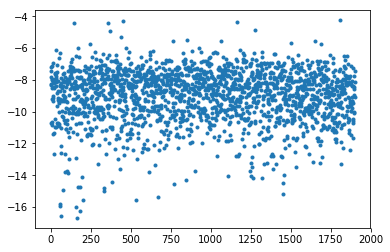

In [264]:

plot(mags,'.')

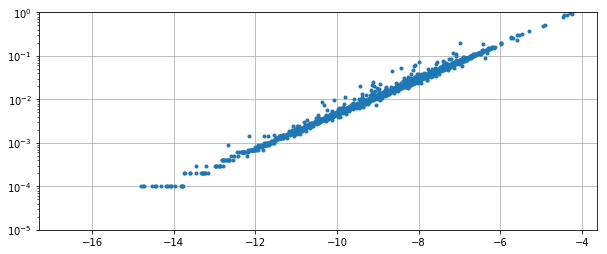

In [265]:
figure(figsize=(10,4))
semilogy(mags, mags_sd, '.')
ylim(1e-5,1)
grid(True)

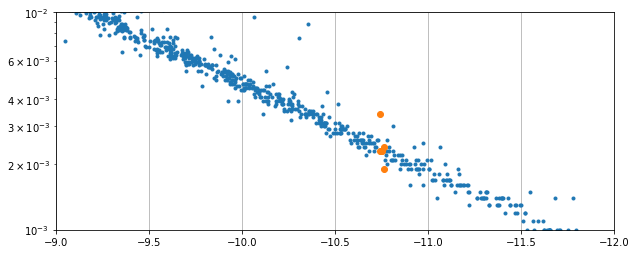

In [252]:
figure(figsize=(10,4))
semilogy(mags, mags_sd, '.')
ylim(1e-3,1e-2)
xlim(-9, -12)
grid(True)

ROI = np.where((np.abs(np.array(mags)+10.75) < .02))[0]
semilogy(mags[ROI], mags_sd[ROI], 'o')



### Investigate these weird (orange) objects:

In [272]:
X = "X_IMAGE"
Y = "Y_IMAGE"
N = "NUMBER"
for ix,obj in enumerate(ROI):
    t = rs[OKs[obj]]
    print("%4.0i %7.1f %7.1f %7.5f" % (t[N][0], t[X][0], t[Y][0],
                                      t[MagE][0]))

 738   535.0   192.0 0.00230
1187   180.3   319.3 0.00340
2441  1434.8   629.1 0.00230
3666   694.6   971.8 0.00240
4594   659.0  1182.5 0.00230
6875   496.6  1804.7 0.00190


# In this initial scout, looks like things brighter than -10 have 1% photometry

In [218]:
TARGs = []

for ix, k in enumerate(rs.keys()):
    if np.all(rs[k][Mag] < 90) and (rs[k][Mag][0] < -10) and \
        good_part(rs[k]):
        TARGs.append(k)

print(len(TARGs), len(OKs))

465 1903


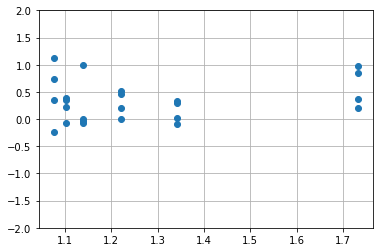

In [274]:
s = np.argsort(gammas)

for targ in TARGs[0:1]:
    ms = rs[targ][Mag]
    plot(gammas[::-1], ms[s]-ms[s][0], 'o')

ylim(-2,2)
grid(True)

# TODO

* Why do so few objects have excellent photometry everywhere?
* Why is MAGERR Bimodal?

In [235]:
ms

array([-10.7242, -10.433 ,  -9.6086,  -9.7226, -10.38  , -10.8023,
        -9.8788, -10.7997, -10.5254, -10.7559, -10.8101, -10.5184,
        -9.7512, -10.2694, -10.953 ,  -9.9845, -10.3349, -10.3538,
       -10.3872, -10.4967, -10.2026, -10.3799, -10.7054, -10.7215])